In [1]:
import os
import sys

import numpy as np

## Plotting stuff
import matplotlib.pyplot as plt
import matplotlib as mpl

## For colorbar 
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Get physical constants from Scipy
import scipy.constants as con

## For fitting
import scipy.optimize as opt

## For matlab loading
import scipy.io as sio

module_path = os.path.abspath(os.path.join('..', "..", ".."))
sys.path.append(module_path)
## Load custom package modules
from misloc_mispol_package.calc import BEM_simulation_wrapper as bem
from misloc_mispol_package.calc import fitting_misLocalization as fit
from misloc_mispol_package.calc import coupled_dipoles as cp
from misloc_mispol_package.optics import diffraction_int as diffi
from misloc_mispol_package.optics import fibonacci as fib

In [2]:
## Parameter setting needs to be in cell following mpl import for some reason 
## https://github.com/jupyter/notebook/issues/3385
##
## Default parameters inspired by 
## http://nipunbatra.github.io/2014/08/latexify/
params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'magma',
    'axes.grid': False,
    'figure.dpi': 200,  # to adjust notebook inline plot size
    'savefig.dpi': 200,  # to adjust notebook inline plot size
#     'axes.labelsize': 12, # fontsize for x and y labels (was 10)
    'axes.titlesize': 14,
    'font.size': 8, # was 10
#     'savefig.dpi': 150,  # to adjust notebook inline plot size
    'axes.labelsize': 10, # fontsize for x and y labels (was 10)
    'axes.titlesize': 10,
    'font.size': 8, # was 10
    'legend.fontsize': 8, # was 10
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'text.usetex': True,
    'figure.figsize': [3.39, 2.10],
    'font.family': 'serif',
    'figure.max_open_warning':10001
}
mpl.rcParams.update(params)

In [3]:
## Some useful numerical constants
hbar = con.physical_constants['Planck constant over 2 pi in eV s'][0]
c = con.physical_constants['speed of light in vacuum'][0]*1e2 #cm/m

m_per_nm = fit.m_per_nm

eps_b = 1.778 ## Water
cm_per_nm = 1E-7

hres_obs_pts = diffi.observation_points(
    -480*m_per_nm, 480*m_per_nm, -480*m_per_nm, 480*m_per_nm, 201)

In [4]:
param_file = 'disk_70nm'
disk_radius = 70/2

## Set molecule positions 
num_per_arc = 3
## The angle and radii ranges must be defined as lists in order to 
## expand them below to get a spherical coordinate for each dipole.
angle_range = np.linspace(0, np.pi/2, num_per_arc).tolist()
radii_range = (np.linspace(0, 80, 8)+disk_radius).tolist()

number_of_mols = len(angle_range) * len(radii_range)

## Build list of angles for each molecule
angles = (angle_range)*len(radii_range)
## Build list of radii for each molecule
radii = [[val]*len(angle_range)for val in radii_range]
## Flatten
radii = [item for sublist in radii for item in sublist]

In [5]:
locations = fib.sphere_to_cart(
    thetas=np.ones(number_of_mols)*np.pi/2,
    phis=angles,
    rs=radii
    )

model_exp = fit.MolCoupNanoRodExp(
    locations, 
    mol_angle=np.array([0]),
    param_file=param_file,
    for_fit=True ## This turns of auto_quenching
    )
 
model_exp.quel_a = model_exp.true_a_un_me
model_exp.quel_c = model_exp.true_a_de_me

rotation_by(E_d_phi).shape = (1, 3, 3)
E_drive.shape = (3,)
alpha_0.shape = (1, 3, 3)
E_drive.shape = (1, 3)
Why???
mol_angle.shape = (1,)
alpha0_diag.shape = (3, 3)
E_d_angle.shape = None
drive_amp.shape = 30.0
p.shape = (24, 3)
p.shape = (24, 3)
rotation_by(E_d_phi).shape = (1, 3, 3)
E_drive.shape = (3,)
p1.shape = (24, 3)
p0_unc.shape = (1, 3)
p.shape = (1, 3)


In [7]:
locations = fib.sphere_to_cart(
    thetas=np.ones(number_of_mols)*np.pi/2,
    phis=angles,
    rs=radii
    )

model_exp = fit.MolCoupNanoRodExp(
    locations, 
    mol_angle=np.array([[0, 0]]),
    param_file=param_file,
    for_fit=True ## This turns of auto_quenching
    )
 
model_exp.quel_a = model_exp.true_a_un_me
model_exp.quel_c = model_exp.true_a_de_me

E_drive.shape after y-rot = (1, 3)
rotation_by(E_d_phi).shape = (1, 3, 3)
E_drive.shape = (1, 3)
alpha_0.shape = (1, 3, 3)
E_drive.shape = (1, 3)
Why???
mol_angle.shape = (1, 2)
alpha0_diag.shape = (3, 3)
E_d_angle.shape = None
drive_amp.shape = 30.0
p.shape = (24, 3)
p.shape = (24, 3)
E_drive.shape after y-rot = (1, 3)
rotation_by(E_d_phi).shape = (1, 3, 3)
E_drive.shape = (1, 3)
p1.shape = (24, 3)
p0_unc.shape = (1, 3)
p.shape = (1, 3)


Calculating Gaussian centroid with analytic images


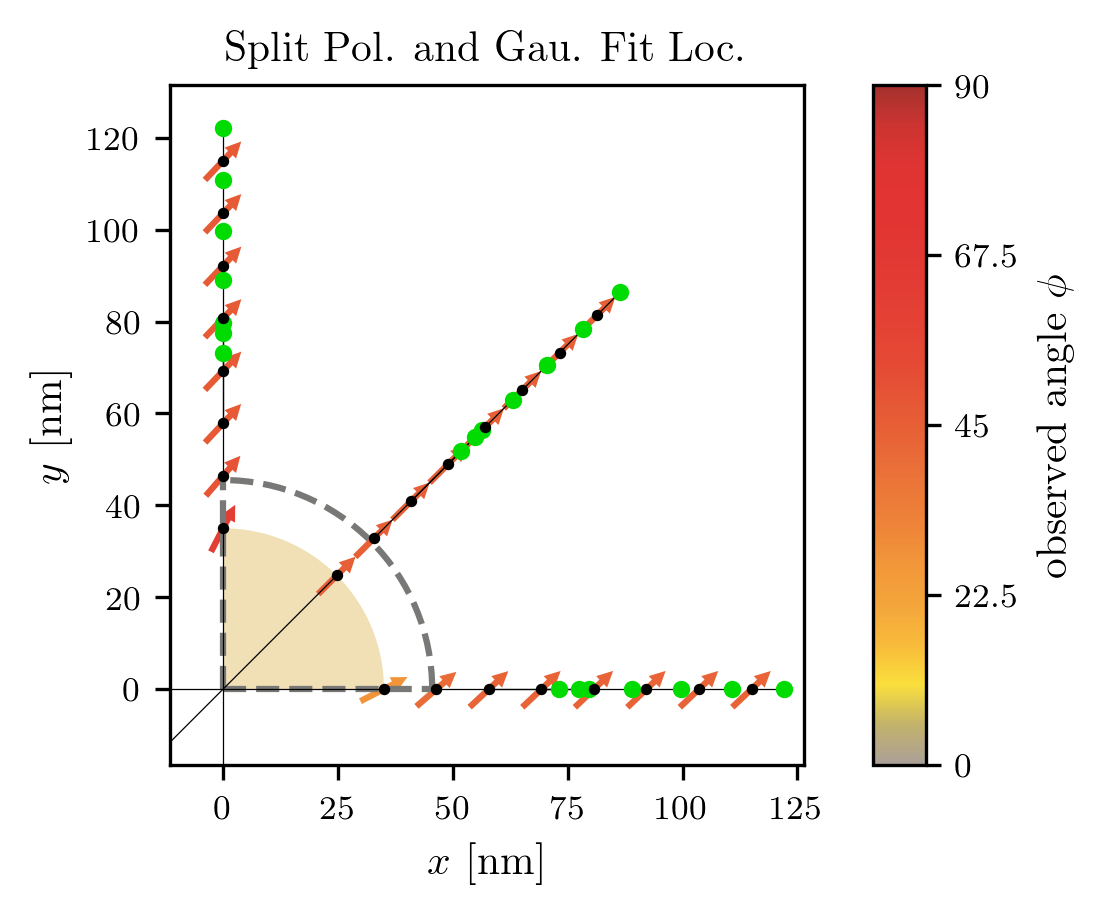

In [8]:
model_exp.plot_mispol_map_wMisloc()

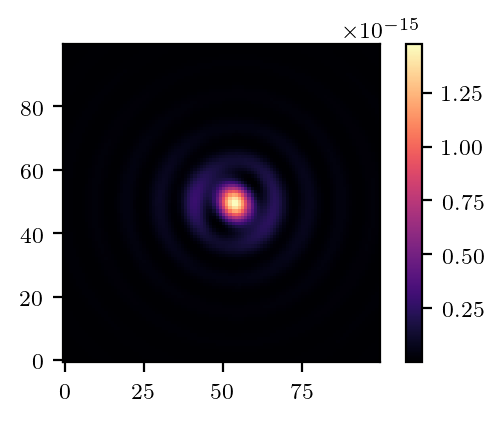

In [20]:
images = np.abs(
    np.sum(
        model_exp.mol_E + model_exp.plas_E, 
        axis=0)
    )**2
plt.imshow(images[-1].reshape((100, 100)))
plt.colorbar()

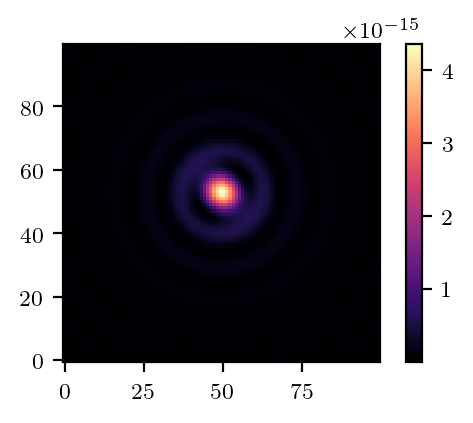

In [10]:
images = np.abs(
    np.sum(
        model_exp.mol_E, 
        axis=0)
    )**2
plt.imshow(images[9].reshape((100, 100)))
plt.colorbar()

In [33]:
param_file = 'disk_70nm'
disk_radius = 70/2

## Set molecule positions 
num_per_arc = 5
## The angle and radii ranges must be defined as lists in order to 
## expand them below to get a spherical coordinate for each dipole.
angle_range = np.linspace(0, np.pi/2, num_per_arc).tolist()
radii_range = (np.array([10])+disk_radius).tolist()

number_of_mols = len(angle_range) * len(radii_range)

## Build list of angles for each molecule
angles = (angle_range)*len(radii_range)
## Build list of radii for each molecule
radii = [[val]*len(angle_range)for val in radii_range]
## Flatten
radii = [item for sublist in radii for item in sublist]

E_drive.shape after y-rot = (1, 3)
rotation_by(E_d_phi).shape = (1, 3, 3)
E_drive.shape = (1, 3)
alpha_0.shape = (1, 3, 3)
E_drive.shape = (1, 3)
Why???
mol_angle.shape = (1, 2)
alpha0_diag.shape = (3, 3)
E_d_angle.shape = None
drive_amp.shape = 30.0
p.shape = (5, 3)
p.shape = (5, 3)
E_drive.shape after y-rot = (1, 3)
rotation_by(E_d_phi).shape = (1, 3, 3)
E_drive.shape = (1, 3)
p1.shape = (5, 3)
p0_unc.shape = (1, 3)
p.shape = (1, 3)
Calculating Gaussian centroid with analytic images


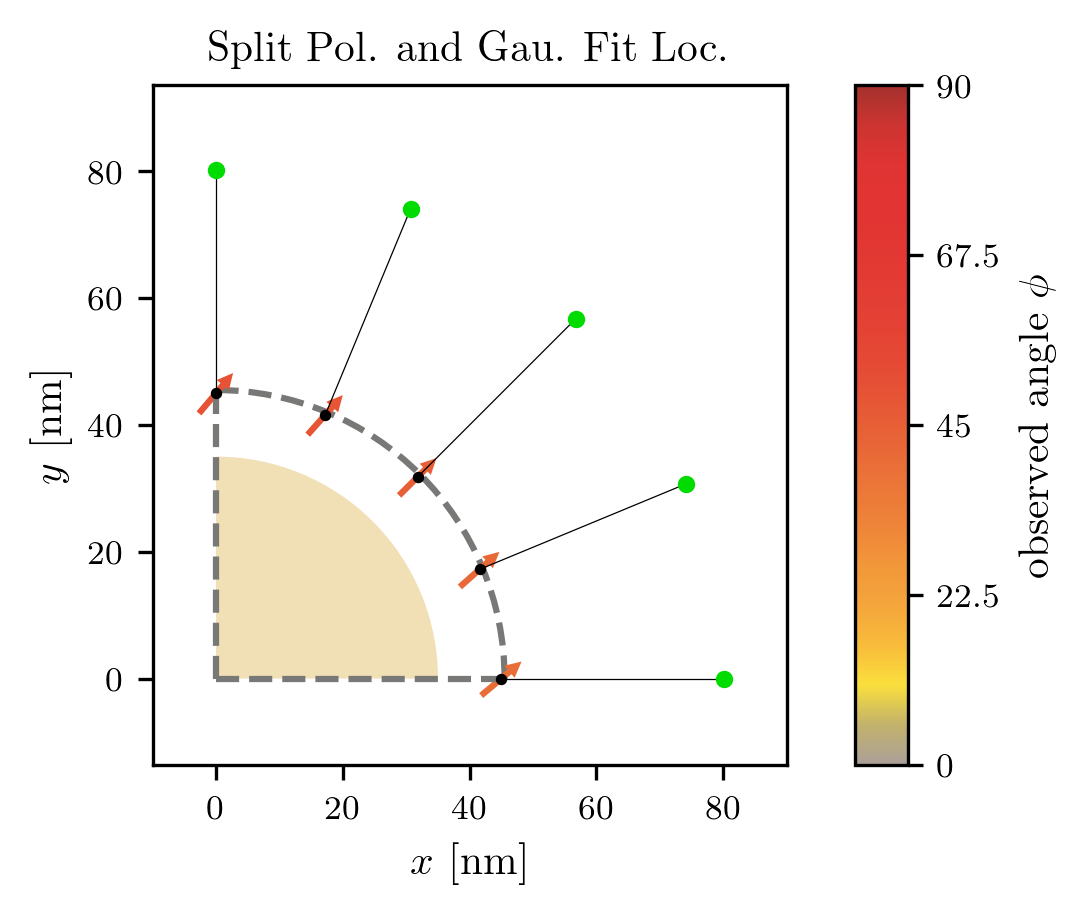

In [34]:
locations = fib.sphere_to_cart(
    thetas=np.ones(number_of_mols)*np.pi/2,
    phis=angles,
    rs=radii
    )

model_exp = fit.MolCoupNanoRodExp(
    locations, 
    mol_angle=np.array([[0, 0]]),
    param_file=param_file,
    for_fit=True ## This turns of auto_quenching
    )
 
model_exp.quel_a = model_exp.true_a_un_me
model_exp.quel_c = model_exp.true_a_de_me

model_exp.plot_mispol_map_wMisloc(plot_limits=[-10, 90])

In [27]:
param_file = 'disk_76nm'
disk_radius = 76/2

## Set molecule positions 
num_per_arc = 5
## The angle and radii ranges must be defined as lists in order to 
## expand them below to get a spherical coordinate for each dipole.
angle_range = np.linspace(0, np.pi/2, num_per_arc).tolist()
radii_range = (np.array([10])+disk_radius).tolist()

number_of_mols = len(angle_range) * len(radii_range)

## Build list of angles for each molecule
angles = (angle_range)*len(radii_range)
## Build list of radii for each molecule
radii = [[val]*len(angle_range)for val in radii_range]
## Flatten
radii = [item for sublist in radii for item in sublist]

E_drive.shape after y-rot = (1, 3)
rotation_by(E_d_phi).shape = (1, 3, 3)
E_drive.shape = (1, 3)
alpha_0.shape = (1, 3, 3)
E_drive.shape = (1, 3)
Why???
mol_angle.shape = (1, 2)
alpha0_diag.shape = (3, 3)
E_d_angle.shape = None
drive_amp.shape = 30.0
p.shape = (5, 3)
p.shape = (5, 3)
E_drive.shape after y-rot = (1, 3)
rotation_by(E_d_phi).shape = (1, 3, 3)
E_drive.shape = (1, 3)
p1.shape = (5, 3)
p0_unc.shape = (1, 3)
p.shape = (1, 3)
Calculating Gaussian centroid with analytic images


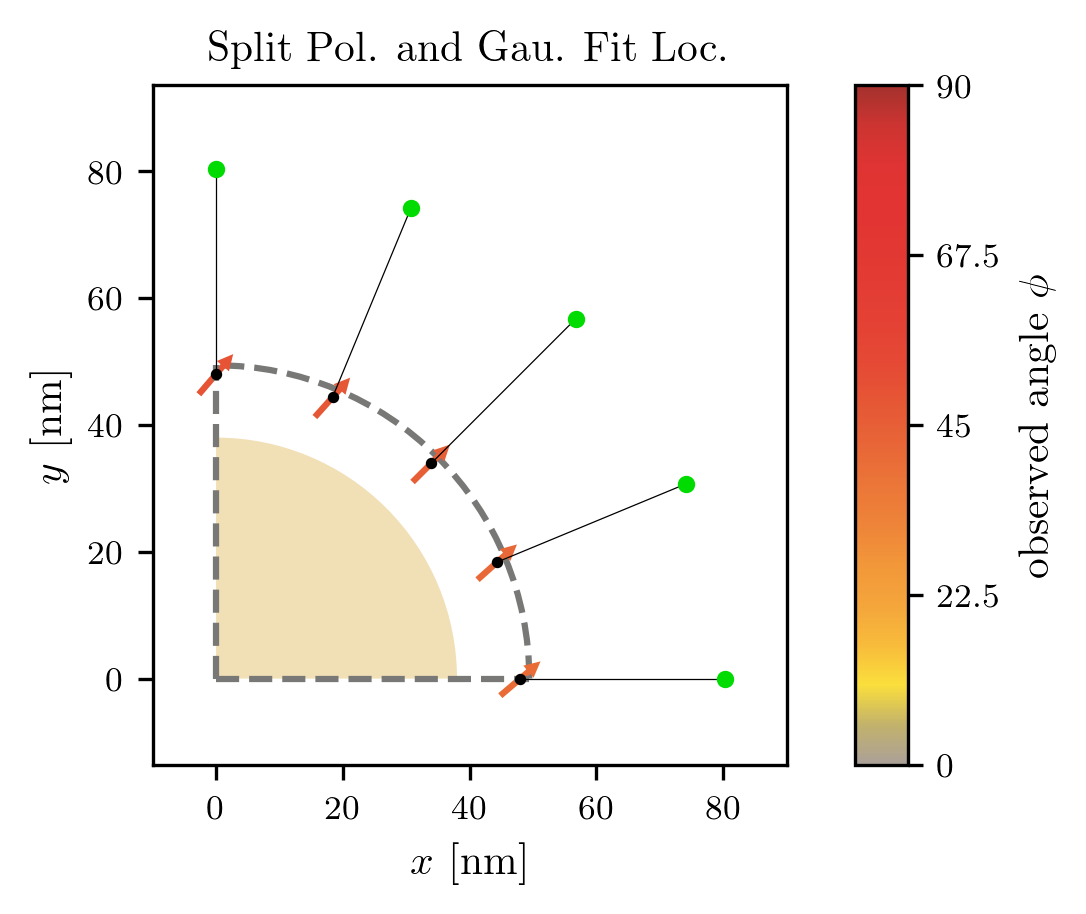

In [28]:
locations = fib.sphere_to_cart(
    thetas=np.ones(number_of_mols)*np.pi/2,
    phis=angles,
    rs=radii
    )

model_exp = fit.MolCoupNanoRodExp(
    locations, 
    mol_angle=np.array([[0, 0]]),
    param_file=param_file,
    for_fit=True ## This turns of auto_quenching
    )
 
model_exp.quel_a = model_exp.true_a_un_me
model_exp.quel_c = model_exp.true_a_de_me

model_exp.plot_mispol_map_wMisloc(plot_limits=[-10, 90])

In [31]:
param_file = 'disk_86nm'
disk_radius = 86/2

## Set molecule positions 
num_per_arc = 5
## The angle and radii ranges must be defined as lists in order to 
## expand them below to get a spherical coordinate for each dipole.
angle_range = np.linspace(0, np.pi/2, num_per_arc).tolist()
radii_range = (np.array([10])+disk_radius).tolist()

number_of_mols = len(angle_range) * len(radii_range)

## Build list of angles for each molecule
angles = (angle_range)*len(radii_range)
## Build list of radii for each molecule
radii = [[val]*len(angle_range)for val in radii_range]
## Flatten
radii = [item for sublist in radii for item in sublist]

E_drive.shape after y-rot = (1, 3)
rotation_by(E_d_phi).shape = (1, 3, 3)
E_drive.shape = (1, 3)
alpha_0.shape = (1, 3, 3)
E_drive.shape = (1, 3)
Why???
mol_angle.shape = (1, 2)
alpha0_diag.shape = (3, 3)
E_d_angle.shape = None
drive_amp.shape = 30.0
p.shape = (5, 3)
p.shape = (5, 3)
E_drive.shape after y-rot = (1, 3)
rotation_by(E_d_phi).shape = (1, 3, 3)
E_drive.shape = (1, 3)
p1.shape = (5, 3)
p0_unc.shape = (1, 3)
p.shape = (1, 3)
Calculating Gaussian centroid with analytic images


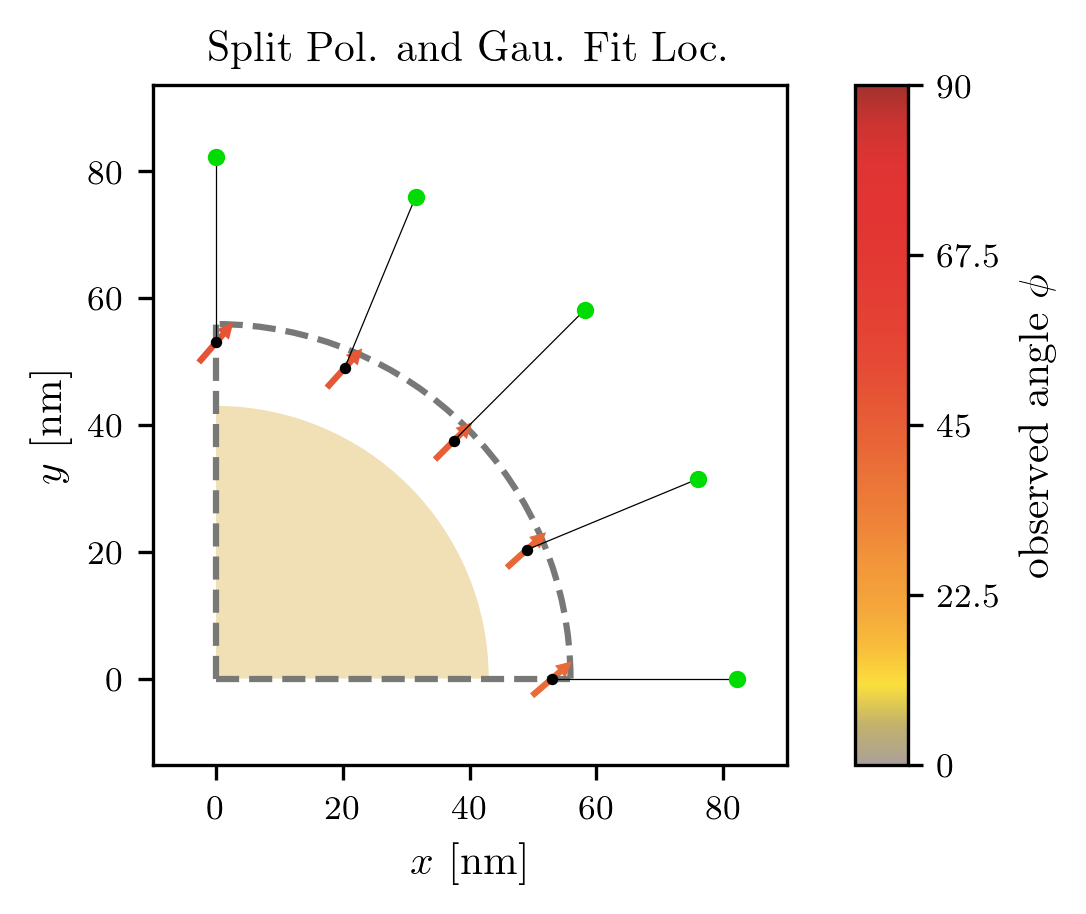

In [32]:
locations = fib.sphere_to_cart(
    thetas=np.ones(number_of_mols)*np.pi/2,
    phis=angles,
    rs=radii
    )

model_exp = fit.MolCoupNanoRodExp(
    locations, 
    mol_angle=np.array([[0, 0]]),
    param_file=param_file,
    for_fit=True ## This turns of auto_quenching
    )
 
model_exp.quel_a = model_exp.true_a_un_me
model_exp.quel_c = model_exp.true_a_de_me

model_exp.plot_mispol_map_wMisloc(plot_limits=[-10, 90])

## Using parameters from fitting data Curly sent me

In [4]:
param_file = 'disk_70nm_fromdata'
disk_radius = 70/2

## Set molecule positions 
num_per_arc = 5
## The angle and radii ranges must be defined as lists in order to 
## expand them below to get a spherical coordinate for each dipole.
angle_range = np.linspace(0, np.pi/2, num_per_arc).tolist()
radii_range = (np.array([10])+disk_radius).tolist()

number_of_mols = len(angle_range) * len(radii_range)

## Build list of angles for each molecule
angles = (angle_range)*len(radii_range)
## Build list of radii for each molecule
radii = [[val]*len(angle_range)for val in radii_range]
## Flatten
radii = [item for sublist in radii for item in sublist]

Calculating Gaussian centroid with analytic images


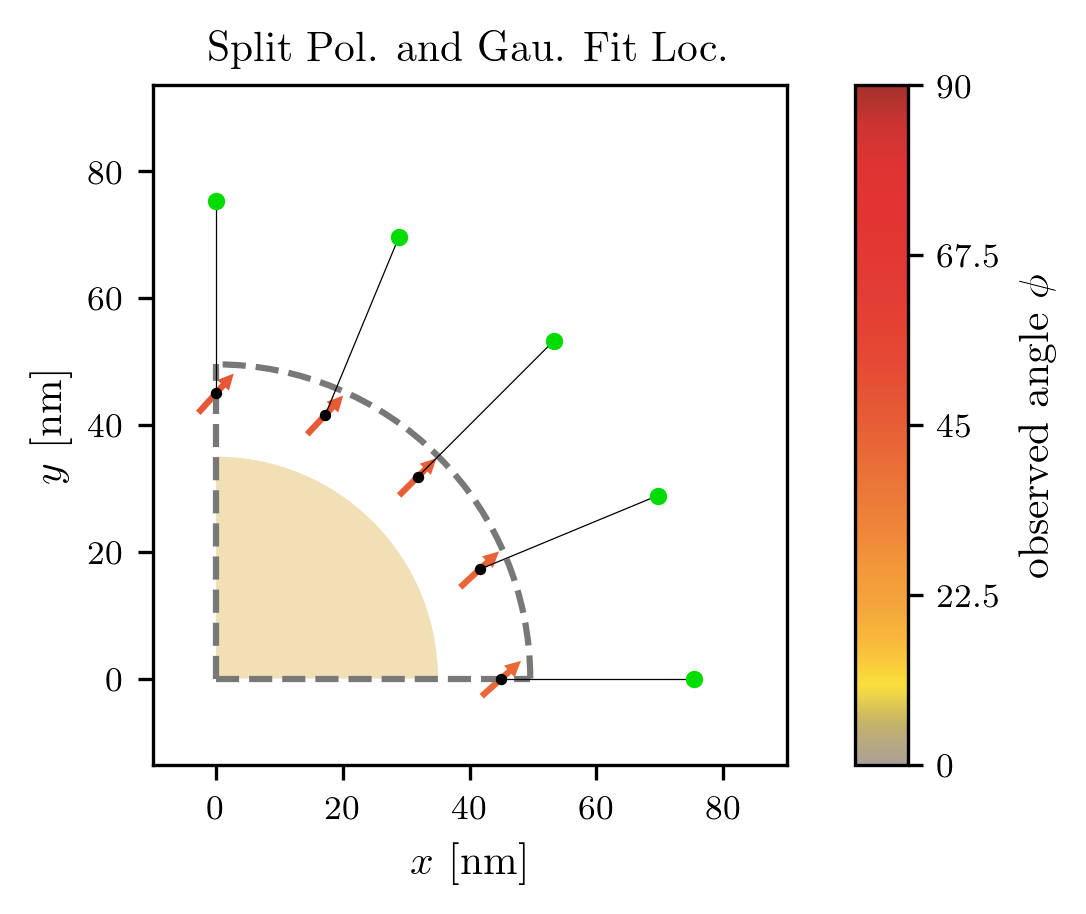

In [5]:
locations = fib.sphere_to_cart(
    thetas=np.ones(number_of_mols)*np.pi/2,
    phis=angles,
    rs=radii
    )

model_exp = fit.MolCoupNanoRodExp(
    locations, 
    mol_angle=np.array([[0, 0]]),
    param_file=param_file,
    for_fit=True ## This turns of auto_quenching
    )
 
model_exp.quel_a = model_exp.true_a_un_me
model_exp.quel_c = model_exp.true_a_de_me

model_exp.plot_mispol_map_wMisloc(plot_limits=[-10, 90])

In [6]:
param_file = 'disk_76nm_fromdata'
disk_radius = 76/2

## Set molecule positions 
num_per_arc = 5
## The angle and radii ranges must be defined as lists in order to 
## expand them below to get a spherical coordinate for each dipole.
angle_range = np.linspace(0, np.pi/2, num_per_arc).tolist()
radii_range = (np.array([10])+disk_radius).tolist()

number_of_mols = len(angle_range) * len(radii_range)

## Build list of angles for each molecule
angles = (angle_range)*len(radii_range)
## Build list of radii for each molecule
radii = [[val]*len(angle_range)for val in radii_range]
## Flatten
radii = [item for sublist in radii for item in sublist]

Calculating Gaussian centroid with analytic images


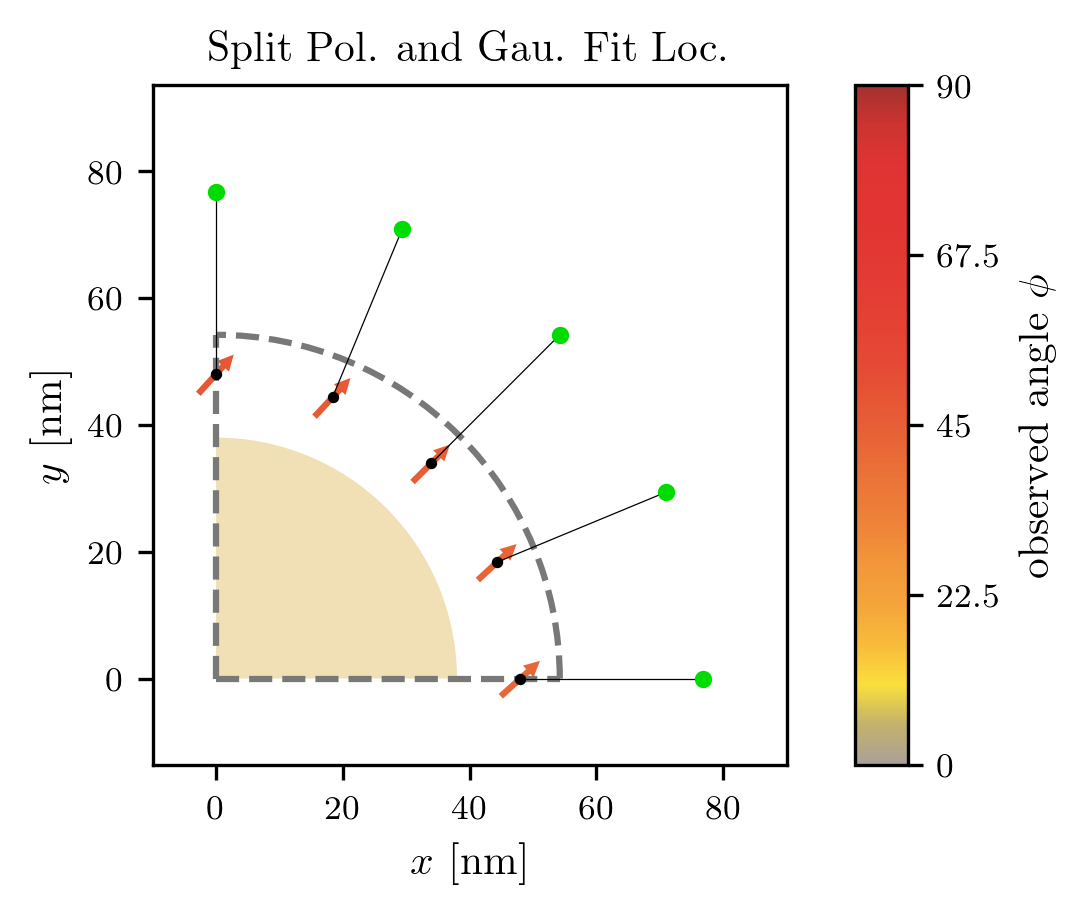

In [7]:
locations = fib.sphere_to_cart(
    thetas=np.ones(number_of_mols)*np.pi/2,
    phis=angles,
    rs=radii
    )

model_exp = fit.MolCoupNanoRodExp(
    locations, 
    mol_angle=np.array([[0, 0]]),
    param_file=param_file,
    for_fit=True ## This turns of auto_quenching
    )
 
model_exp.quel_a = model_exp.true_a_un_me
model_exp.quel_c = model_exp.true_a_de_me

model_exp.plot_mispol_map_wMisloc(plot_limits=[-10, 90])

In [8]:
param_file = 'disk_86nm_fromdata'
disk_radius = 86/2

## Set molecule positions 
num_per_arc = 5
## The angle and radii ranges must be defined as lists in order to 
## expand them below to get a spherical coordinate for each dipole.
angle_range = np.linspace(0, np.pi/2, num_per_arc).tolist()
radii_range = (np.array([10])+disk_radius).tolist()

number_of_mols = len(angle_range) * len(radii_range)

## Build list of angles for each molecule
angles = (angle_range)*len(radii_range)
## Build list of radii for each molecule
radii = [[val]*len(angle_range)for val in radii_range]
## Flatten
radii = [item for sublist in radii for item in sublist]

Calculating Gaussian centroid with analytic images


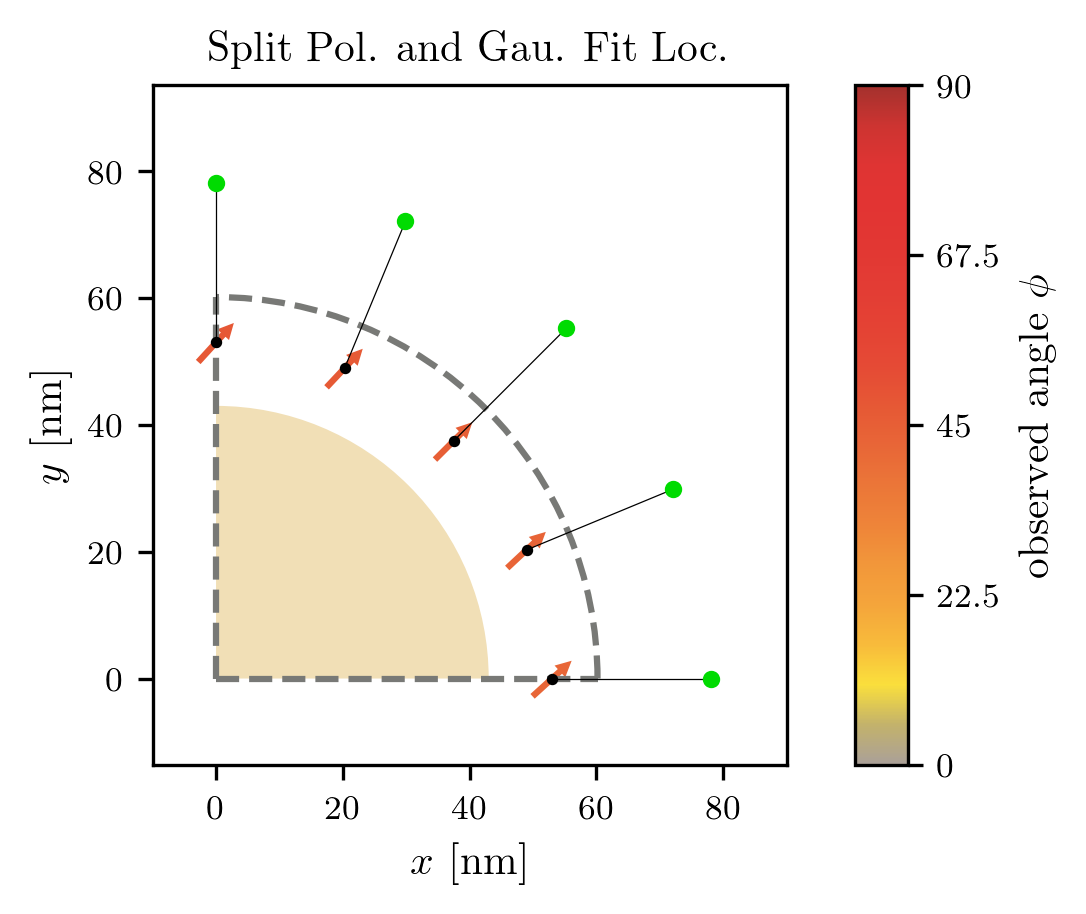

In [9]:
locations = fib.sphere_to_cart(
    thetas=np.ones(number_of_mols)*np.pi/2,
    phis=angles,
    rs=radii
    )

model_exp = fit.MolCoupNanoRodExp(
    locations, 
    mol_angle=np.array([[0, 0]]),
    param_file=param_file,
    for_fit=True ## This turns of auto_quenching
    )
 
model_exp.quel_a = model_exp.true_a_un_me
model_exp.quel_c = model_exp.true_a_de_me

model_exp.plot_mispol_map_wMisloc(plot_limits=[-10, 90])